In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import AdaBoostRegressor, ExtraTreesRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import warnings
import random

In [3]:
df = pd.read_csv("./Ali_Baba_Stock_Data.csv")
df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2617 entries, 2014-09-19 to 2025-02-13
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  2617 non-null   float64
 1   Close      2617 non-null   float64
 2   High       2617 non-null   float64
 3   Low        2617 non-null   float64
 4   Open       2617 non-null   float64
 5   Volume     2617 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 143.1 KB


In [5]:
df.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2014-09-19,90.673950,93.889999,99.699997,89.949997,92.699997,271879400
2014-09-22,86.810966,89.889999,92.949997,89.500000,92.699997,66657800
2014-09-23,84.184128,87.169998,90.480003,86.620003,88.940002,39009800
2014-09-24,87.467667,90.570000,90.570000,87.220001,88.470001,32088000
2014-09-25,85.874191,88.919998,91.500000,88.500000,91.089996,28598000


In [6]:
df.describe()

,Adj Close,Close,High,Low,Open,Volume
count,2617.000000,2617.000000,2617.000000,2617.000000,2617.000000,2.617000e+03
mean,130.763001,135.153905,136.919684,133.360942,135.248746,1.899231e+07
std,56.741744,58.951556,59.579593,58.244218,59.037467,1.291504e+07
min,55.424198,57.389999,58.650002,57.200001,57.299999,3.775300e+06
25%,82.445793,84.849998,85.699997,84.000000,85.000000,1.186070e+07
50%,105.469185,108.989998,110.650002,107.260002,108.500000,1.600840e+07
75%,173.061798,179.199997,181.389999,177.000000,179.369995,2.172430e+07
max,306.276886,317.140015,319.320007,308.910004,313.500000,2.718794e+08


In [7]:
df.columns

Index(['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

检测异常值并将其从数据集中删除

Adj Close

In [8]:
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimHei']

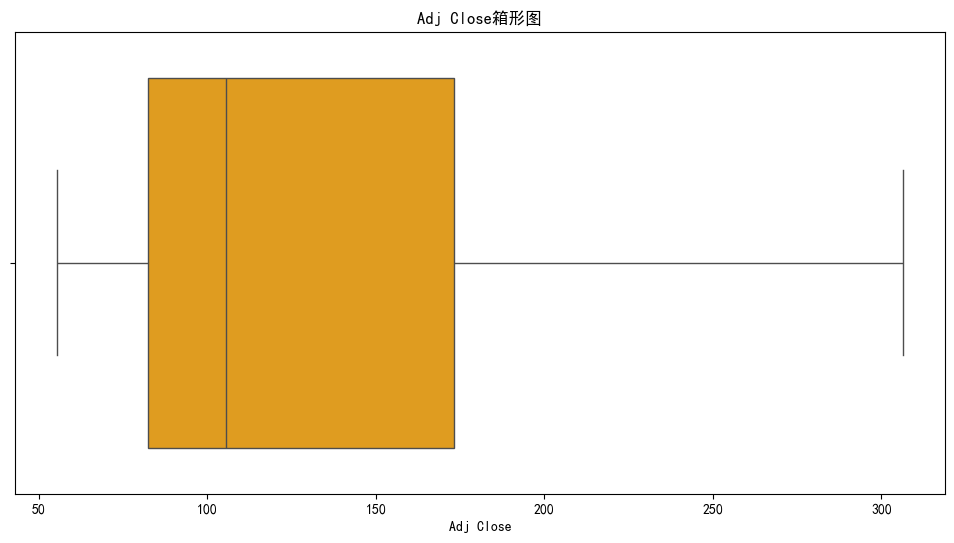

In [9]:
plt.figure(figsize=(12,6))
sns.boxplot(x=df["Adj Close"],color = "orange")
plt.title("Adj Close箱形图")
plt.xlabel("Adj Close")
plt.show()

没有异常值

Close

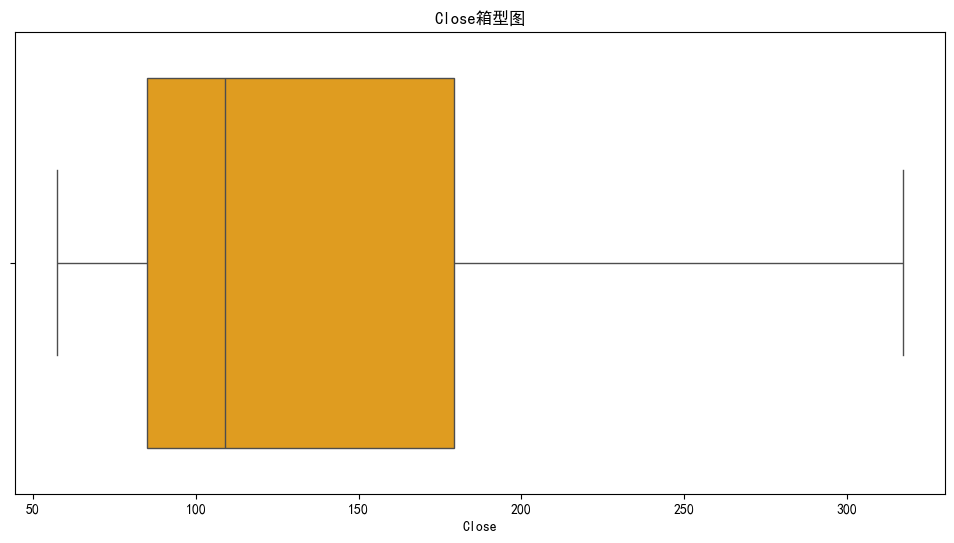

In [10]:
plt.figure(figsize=(12,6))
sns.boxplot(x=df["Close"],color = "orange")
plt.title("Close箱型图")
plt.xlabel("Close")
plt.show()

没有异常值

High

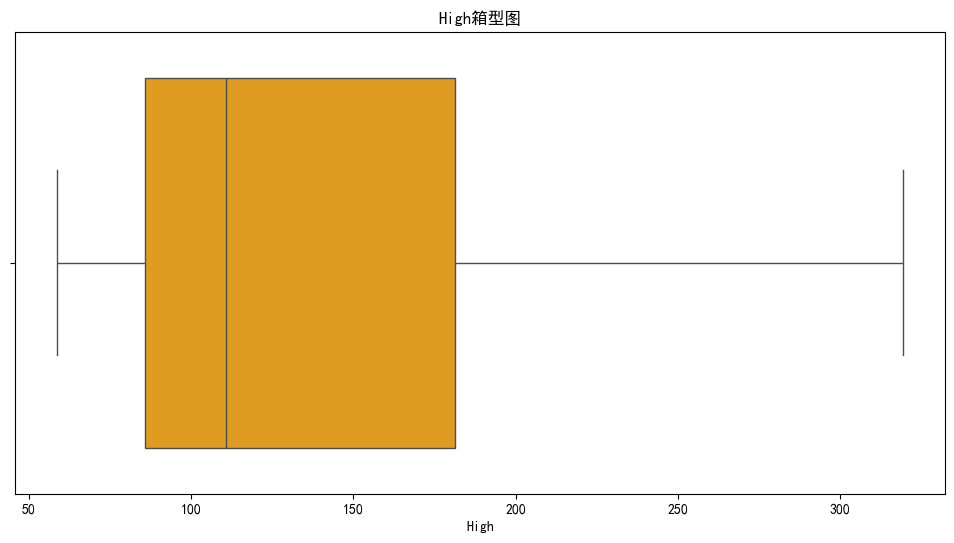

In [11]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df["High"],color ="orange")
plt.title("High箱型图")
plt.xlabel("High")
plt.show()

没有异常值

Low

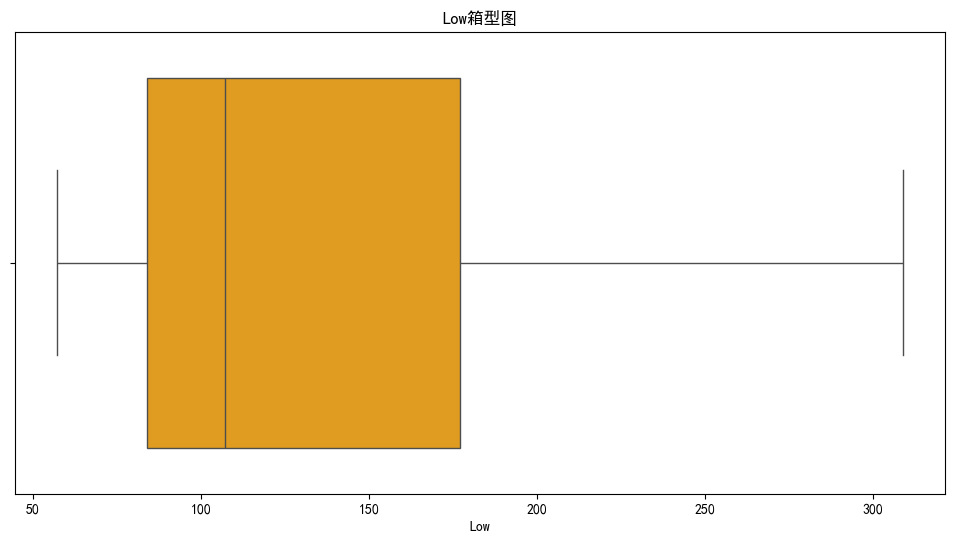

In [12]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df["Low"], color = "orange")
plt.title("Low箱型图")
plt.xlabel("Low")
plt.show()

没有异常值

Open

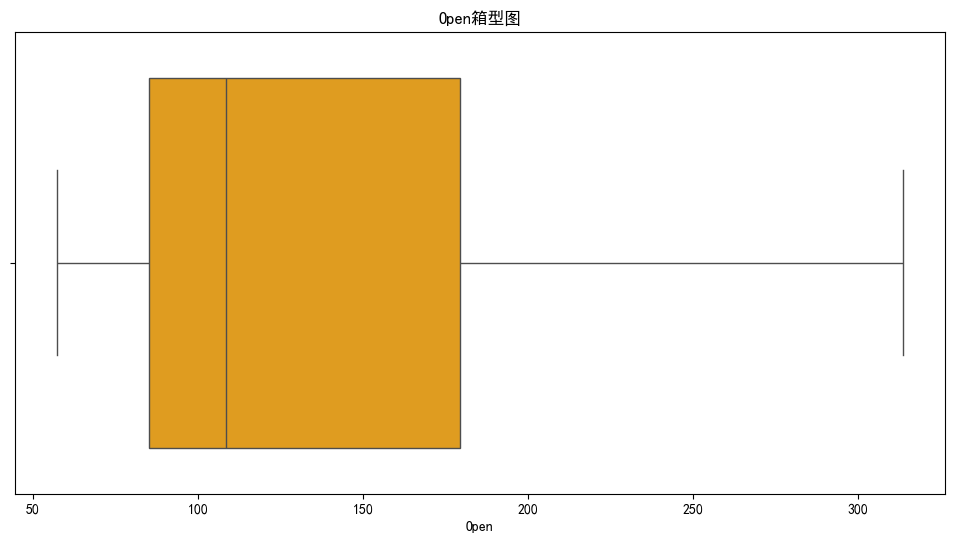

In [13]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df["Open"], color = "orange")
plt.title("Open箱型图")
plt.xlabel("Open")
plt.show()

没有异常值

Volume

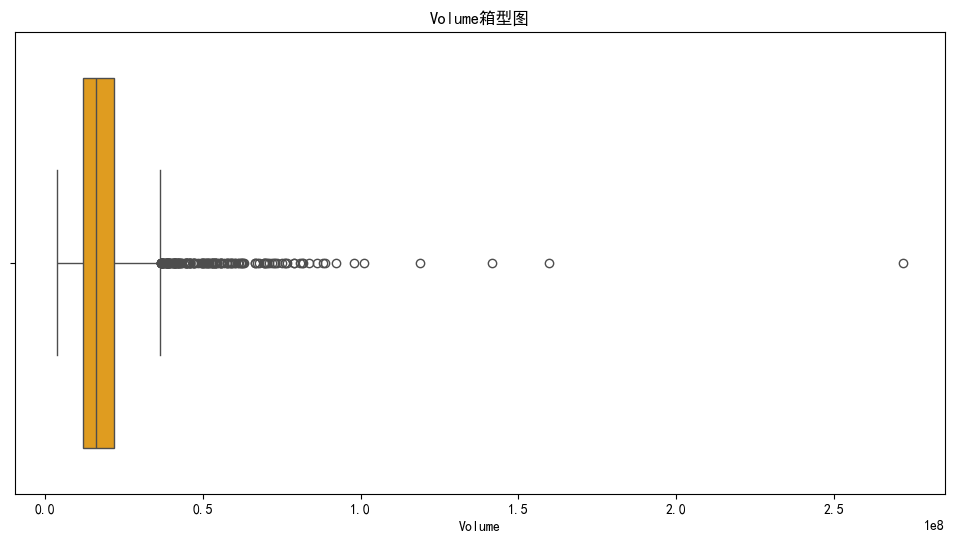

In [14]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df["Volume"], color = "orange")
plt.title("Volume箱型图")
plt.xlabel("Volume")
plt.show()

我们使用 IQR（四分位距）法分析了数据集中的交易量（Volume）一栏，得出以下结果：
数据点总数 2617
检测到的异常值：157 个 (6%)
异常值的平均交易量：5 570 万个
异常值的最小值和最大值：
最小值 3660 万
最大值 2.718 亿（显然是一个极端离群值！）

异常值在金融数据中很重要：交易量的显著增加通常是由重大市场变动、投资者情绪或重要新闻（如盈利报告、重大交易）引起的。
异常值比例低（6%）：由于异常值只占数据集的6%，因此剔除异常值会增加分析重大市场动向的难度。
更合理的方法：我们可以只剔除极端值（如交易量超过2亿），而不是剔除所有异常值，这样分析效果会更好。

In [15]:
Q1 = df["Volume"].quantile(0.25)  #25%
Q3 = df["Volume"].quantile(0.75)  #75%
IQR = Q3 - Q1  

lower_bound = Q1 - 1.5 * IQR  #下界 
upper_bound = Q3 + 1.5 * IQR #上界

#确认异常值
outliers = df[(df["Volume"] < lower_bound) | (df["Volume"] > upper_bound)]

#异常值数量
outlier_count = len(outliers)

print("Total Number of Outliers:", outlier_count)

Total Number of Outliers: 157


我们只移除极端离群值（高于第 99 个百分位数的值）

In [16]:
upper_threshold = df["Volume"].quantile(0.99)
df_filtered = df[df["Volume"] <= upper_threshold]

# 展示删除行的数量
rows_removed = len(df) - len(df_filtered)
print("极端值删除的数量为:", rows_removed)

极端值删除的数量为: 27


In [17]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2590 entries, 2014-09-22 to 2025-02-13
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  2590 non-null   float64
 1   Close      2590 non-null   float64
 2   High       2590 non-null   float64
 3   Low        2590 non-null   float64
 4   Open       2590 non-null   float64
 5   Volume     2590 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 141.6 KB


新的交易量箱型图

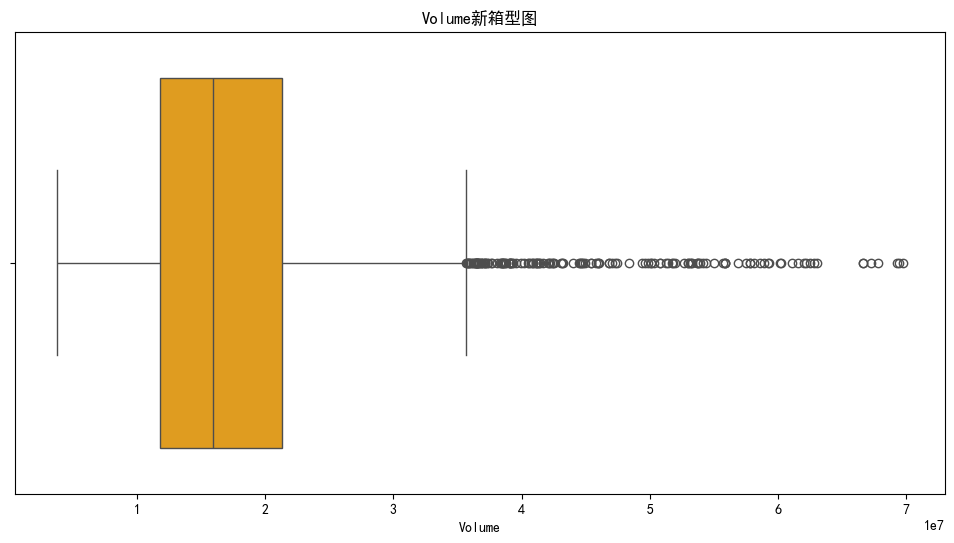

In [18]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_filtered["Volume"], color = "orange")
plt.title("Volume新箱型图")
plt.xlabel("Volume")
plt.show()

可视化

收盘价趋势可视化

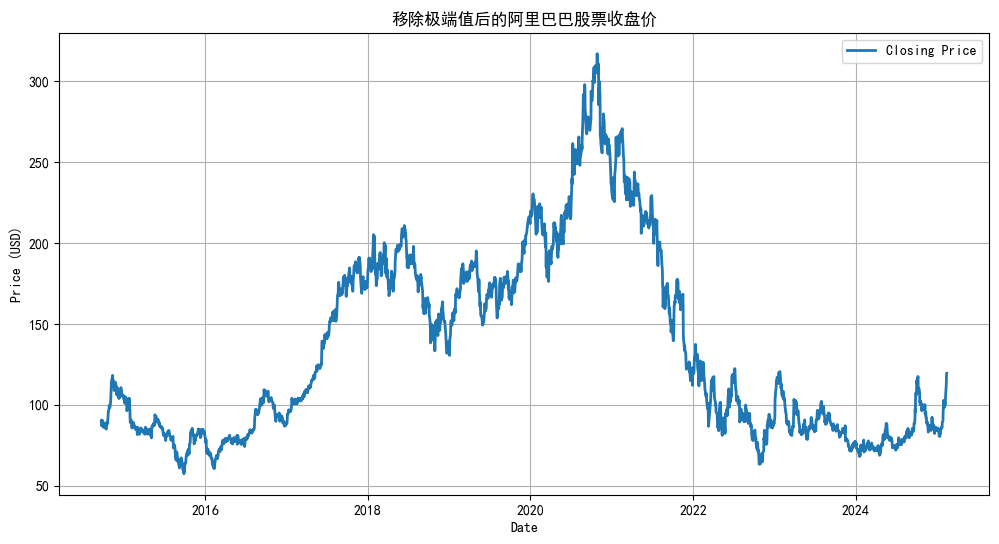

In [19]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=df_filtered.index, y=df_filtered["Close"], label="Closing Price", linewidth=2)
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.title("移除极端值后的阿里巴巴股票收盘价")
plt.legend()
plt.grid()
plt.show()

移动平均线

C:\Users\29918\AppData\Local\Temp\ipykernel_15672\987879303.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.loc[:, "Close_MA50"] = df_filtered["Close"].rolling(window=50, min_periods=1).mean()
C:\Users\29918\AppData\Local\Temp\ipykernel_15672\987879303.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.loc[:, "Close_MA200"] = df_filtered["Close"].rolling(window=200, min_periods=1).mean()


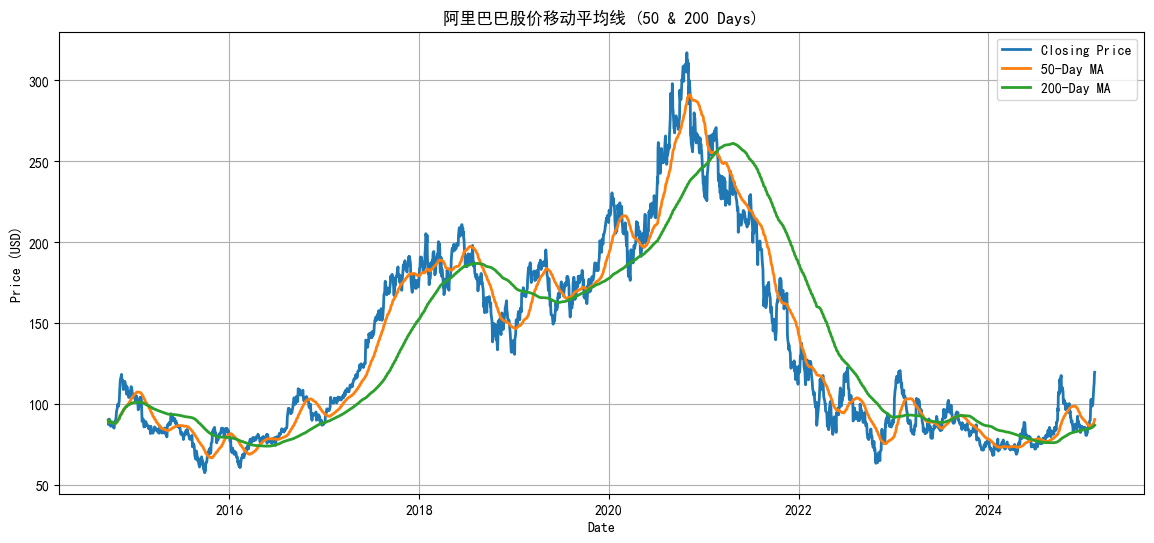

In [20]:
plt.figure(figsize=(14, 6))
df_filtered.loc[:, "Close_MA50"] = df_filtered["Close"].rolling(window=50, min_periods=1).mean()
df_filtered.loc[:, "Close_MA200"] = df_filtered["Close"].rolling(window=200, min_periods=1).mean()
sns.lineplot(x=df_filtered.index, y=df_filtered["Close"], label="Closing Price", linewidth=2)
sns.lineplot(x=df_filtered.index, y=df_filtered["Close_MA50"], label="50-Day MA", linewidth=2)
sns.lineplot(x=df_filtered.index, y=df_filtered["Close_MA200"], label="200-Day MA", linewidth=2)
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.title("阿里巴巴股价移动平均线 (50 & 200 Days)")
plt.legend()
plt.grid()
plt.show()

成交量-收盘价散点图

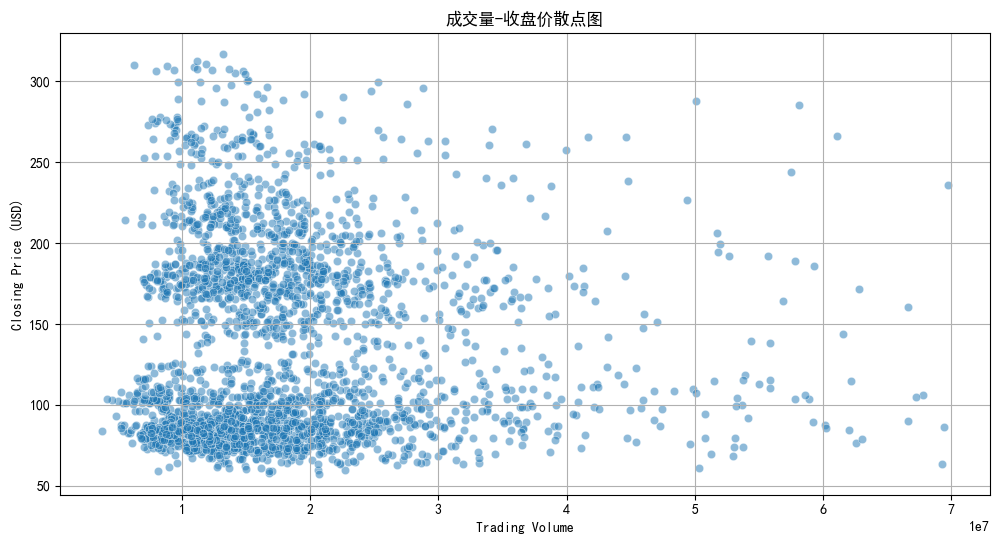

In [21]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df_filtered["Volume"], y=df_filtered["Close"], alpha=0.5)
plt.xlabel("Trading Volume")
plt.ylabel("Closing Price (USD)")
plt.title("成交量-收盘价散点图")
plt.grid()
plt.show()

相关性分析热力图

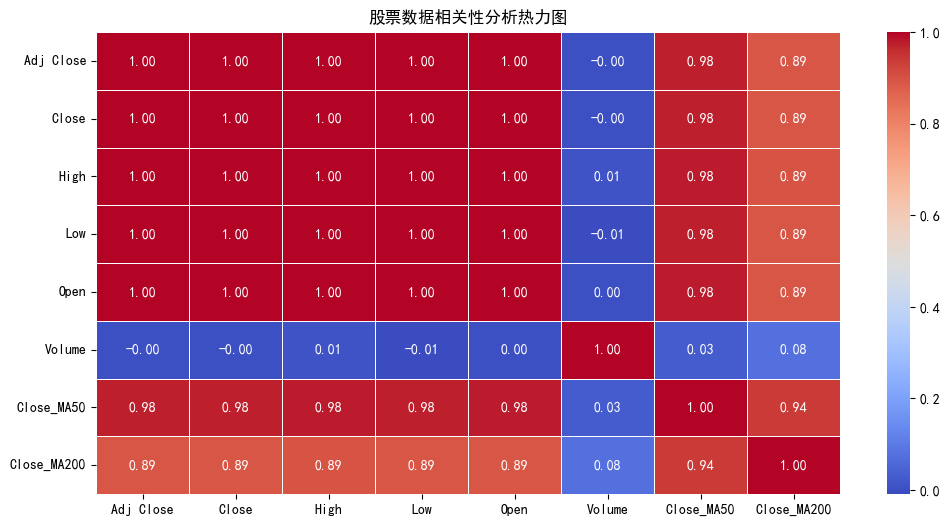

In [22]:
plt.figure(figsize=(12, 6))
sns.heatmap(df_filtered.corr(numeric_only = True), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("股票数据相关性分析热力图")
plt.show()

机器学习建模

In [24]:
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [25]:
features = ["Open", "High", "Low", "Volume"]
target = "Close"
X = df_filtered[features]
y = df_filtered[target]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=537)

特征标准化

In [27]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Support Vector Machine": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "Neural Network": MLPRegressor(max_iter=500),
    "Gaussian Process": GaussianProcessRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "Extra Trees": ExtraTreesRegressor()
}

训练和评估模型

In [29]:
results = {}
for name, model in models.items():
    start_time = time.time()
    model.fit(X_train_scaled, y_train)
    training_time = time.time() - start_time
    
    y_pred = model.predict(X_test_scaled)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {"MAE": mae, "MSE": mse, "R2": r2, "Training Time (s)": training_time}

将结果转换为 DataFrame

In [30]:
results_df = pd.DataFrame(results).T
results_df

,MAE,MSE,R2,Training Time (s)
Linear Regression,0.744000,1.092701,0.999679,0.000000
Decision Tree,1.212278,3.107553,0.999089,0.026518
Random Forest,0.969556,1.996231,0.999414,0.710699
Gradient Boosting,1.076219,2.428765,0.999288,0.334078
Support Vector Machine,4.086429,136.784582,0.959879,0.122439
K-Nearest Neighbors,1.548453,5.918098,0.998264,0.005538
Neural Network,1.433552,3.822312,0.998879,2.966555
Gaussian Process,17.997708,41762.539224,-11.249579,0.279713
AdaBoost,2.518042,9.453656,0.997227,0.174384
Extra Trees,0.924576,1.843819,0.999459,0.408502


将结果按精度和速度排序转换为 DataFrame 

In [31]:
results_df = pd.DataFrame(results).T
results_df_sorted = results_df.sort_values(by=["Training Time (s)", "R2"], ascending=[True, False])
results_df_sorted

,MAE,MSE,R2,Training Time (s)
Linear Regression,0.744000,1.092701,0.999679,0.000000
K-Nearest Neighbors,1.548453,5.918098,0.998264,0.005538
Decision Tree,1.212278,3.107553,0.999089,0.026518
Support Vector Machine,4.086429,136.784582,0.959879,0.122439
AdaBoost,2.518042,9.453656,0.997227,0.174384
Gaussian Process,17.997708,41762.539224,-11.249579,0.279713
Gradient Boosting,1.076219,2.428765,0.999288,0.334078
Extra Trees,0.924576,1.843819,0.999459,0.408502
Random Forest,0.969556,1.996231,0.999414,0.710699
Neural Network,1.433552,3.822312,0.998879,2.966555
